In [2]:
import os
import sys
from itertools import combinations

import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, StandardScaler
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm, trange

from utils import *

In [3]:
from jupyterthemes import jtplot
jtplot.style('grade3')

In [4]:
dataset_train = GroupDataset(train=True)
dataset_valid = GroupDataset(train=False)

In [5]:
x_train, y_train = dataset_train.get_xy()
x_valid, y_valid = dataset_valid.get_xy()

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=SEED)
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_valid)

In [ ]:
print(classification_report(y_valid, pred, digits=4))

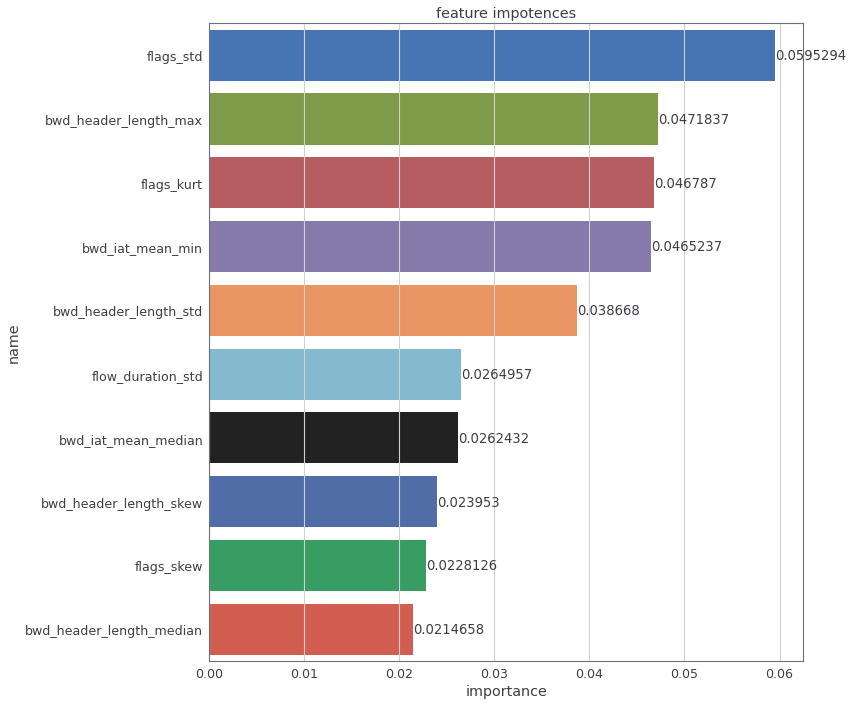

In [ ]:
top_k = 10
plt.figure(figsize=(12, top_k))
plt.title("feature impotences")
temp_df = pd.DataFrame(zip(*[dataset_valid.feature_names, model.feature_importances_]), columns=['name', 'importance'])
temp_df = temp_df.sort_values(by='importance', ascending=False)
g = sns.barplot(data=temp_df.head(top_k), x='importance', y='name', orient='h')
g.bar_label(g.containers[0])
plt.tight_layout()
plt.show()

In [ ]:
fp = x_valid[(pred == 1) & (y_valid == 0)]
fn = x_valid[(pred == 0) & (y_valid == 1)]
mal = x_valid[y_valid == 1]
ben = x_valid[y_valid == 0]

In [ ]:
df_temp = pd.DataFrame(np.concatenate([fp, fn, mal, ben]), columns=dataset_valid.get_feature_names())

In [ ]:
df_temp['label'] = ['fp'] * fp.shape[0] + ['fn'] * fn.shape[0] + ['mal'] * mal.shape[0] + ['ben'] * ben.shape[0]

In [ ]:
len(dataset_valid.feature_names)

357

In [ ]:
ncols = 7
nrows = 51
fig, axs = plt.subplots(nrows, ncols, figsize=(30, 140))
for idx, col in enumerate(tqdm(df_temp.columns[:-1])):
    cur_ax = axs[idx // ncols][idx % ncols]
    sns.kdeplot(data=df_temp, x=col, hue='label', legend=True, warn_singular=False, ax=cur_ax, common_norm=False)
plt.tight_layout()
plt.savefig(f"aa.svg")
plt.savefig(f"aa.jpg")
plt.cla()
plt.clf()
_ = 0

  0%|          | 0/357 [00:00<?, ?it/s]

<Figure size 2160x10080 with 0 Axes>